In [1]:
import gzip
import numpy as np
import sys
import matplotlib.pyplot as plt

def training_images():
    with gzip.open('train-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count*column_count))
        return images


def training_labels():
    with gzip.open('train-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
def test_labels():
    with gzip.open('t10k-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
def test_images():
    with gzip.open('t10k-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count* column_count))
        return images


In [2]:
train_images=training_images()
train_labels=training_labels()
test_images=test_images()
test_labels=test_labels()
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)
train_images.squeeze()
train_images.shape


(60000, 784) (60000,) (10000, 784) (10000,)


(60000, 784)

In [3]:
allclasses=[];
for i in range(10):
    allclasses.append([]);
for i in range(60000):
    allclasses[train_labels[i]].append(train_images[i])
for i in range(10):
    allclasses[i]=np.array(allclasses[i]);

CLASS  0


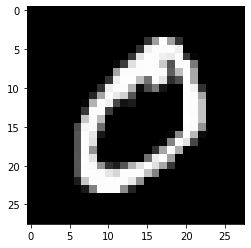

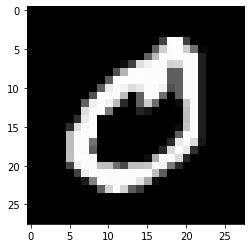

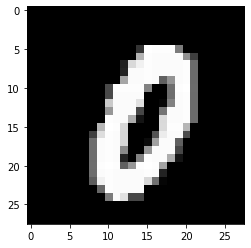

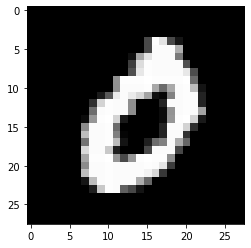

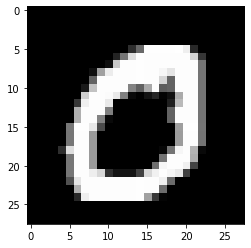

CLASS  1


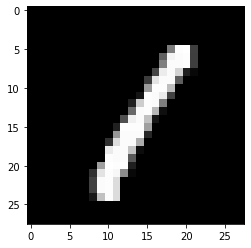

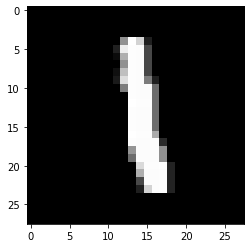

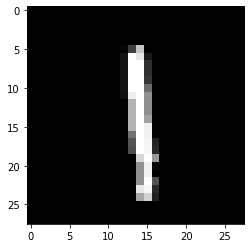

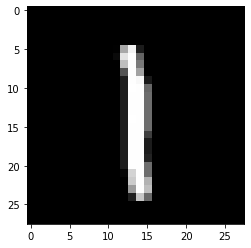

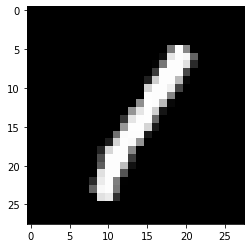

CLASS  2


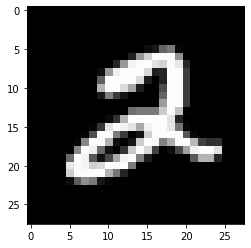

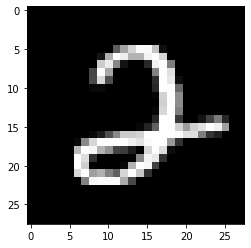

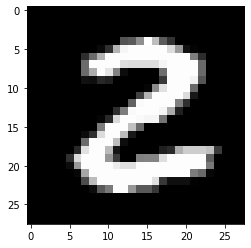

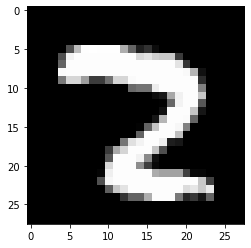

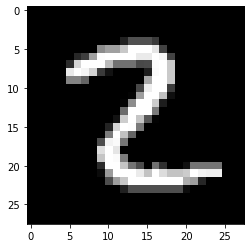

CLASS  3


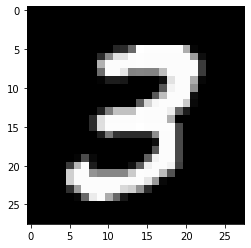

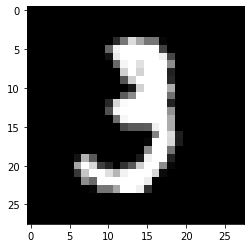

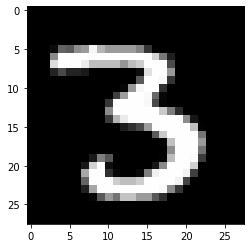

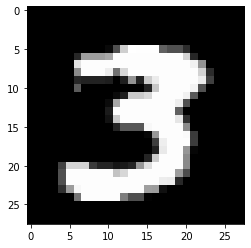

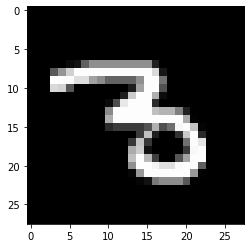

CLASS  4


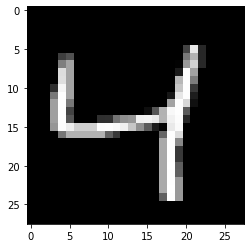

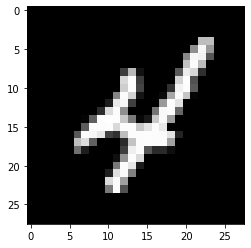

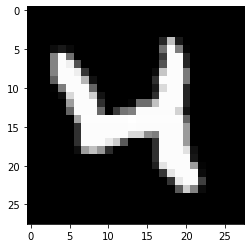

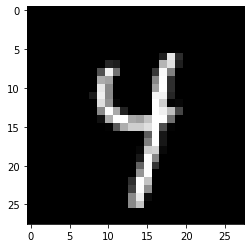

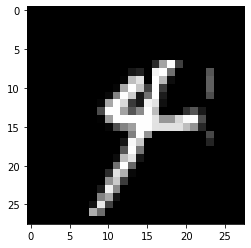

CLASS  5


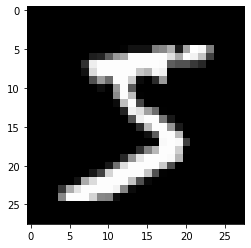

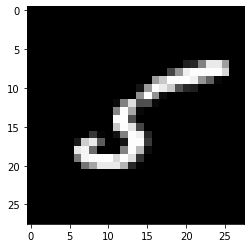

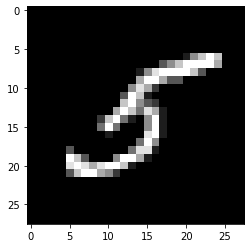

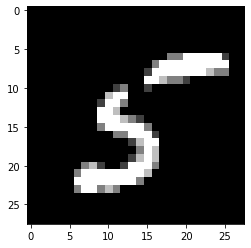

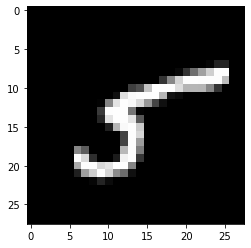

CLASS  6


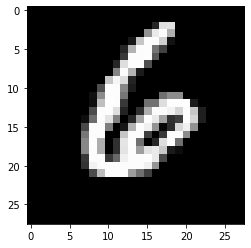

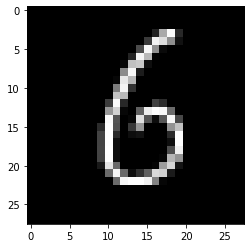

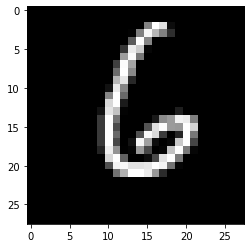

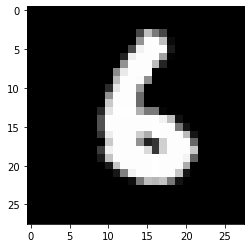

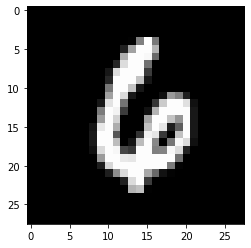

CLASS  7


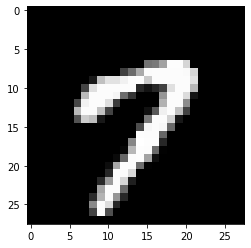

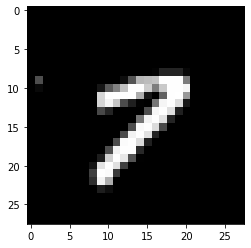

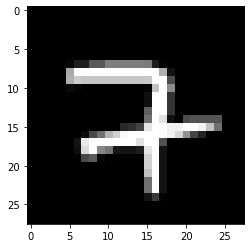

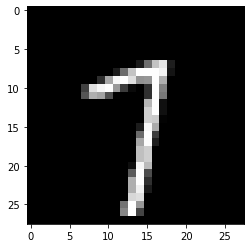

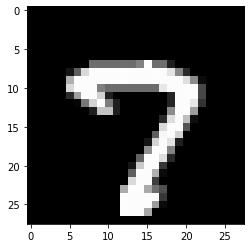

CLASS  8


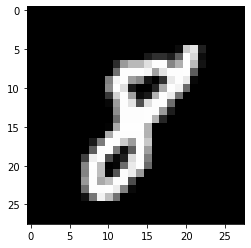

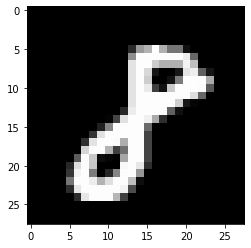

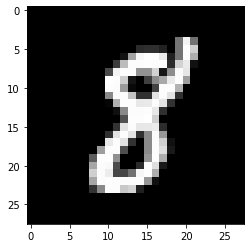

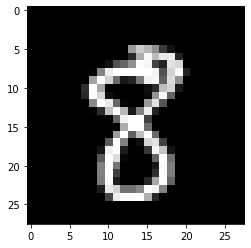

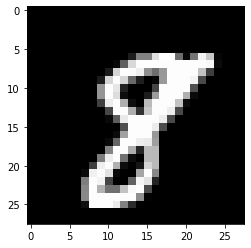

CLASS  9


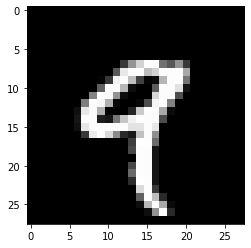

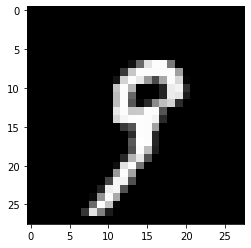

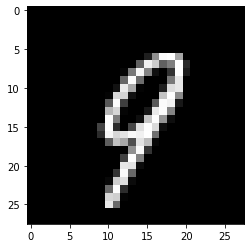

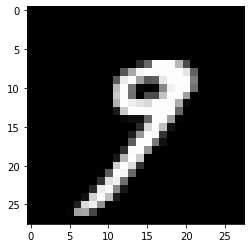

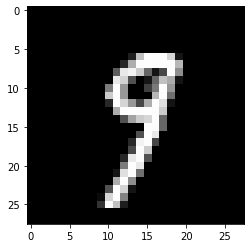

In [4]:
for i in range(10):
    data = allclasses[i].reshape(len(allclasses[i]), 28, 28)
    print("CLASS ", i)
    for j in range(5):
        image = np.asarray(data[j]).squeeze()
        plt.imshow(image,cmap='gray')
        plt.show()

In [5]:
allclasses=np.array(allclasses,dtype=object)
allclasses.shape

(10,)

In [6]:
sum=0
for i in range(10):
    sum+=len(allclasses[i])
    print(len(allclasses[i]))
print(sum)
np.concatenate(allclasses)
print(allclasses[0][1].shape)

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949
60000
(784,)


In [7]:
allclassesmean=[]
allclassescov=[]

for i in range(10):
    allclassesmean.append([]);
    allclassescov.append([]);
for i in range(10):
    allclassesmean[i]=np.mean(allclasses[i],axis=0)
    xicentered=allclasses[i]-allclassesmean[i]
    xicentered=np.array(xicentered)
    xixi=np.dot(xicentered.T,xicentered)
    allclassescov[i]=xixi/len(allclasses[i])

    
allclassesmean=np.array(allclassesmean)
allclassescov=np.array(allclassescov)

allclassescov.shape

(10, 784, 784)

In [8]:
allclassesscatter=[]
allclassescentralised=[]
for i in range(10):
    allclassesscatter.append([]);
    allclassescentralised.append([]);
for i in range(10):
    for j in range(len(allclasses[i])):
        allclassescentralised[i].append(allclasses[i][j]-allclassesmean[i]);

for i in range(10):
    allclassescentralised[i]=np.array(allclassescentralised[i])

In [9]:
allclassescentralised=np.array(allclassescentralised,dtype=object)

In [10]:
allclassescentralised[1].shape



(6742, 784)

In [11]:
for i in range(10):
    allclassesscatter[i]=np.dot(allclassescentralised[i].T,allclassescentralised[i])


In [12]:
for i in range(10):
    allclassesscatter[i]=np.array(allclassesscatter[i])
allclassesscatter=np.array(allclassesscatter)

In [13]:
allclassesscatter.shape
allclassesscatter[7]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
Sw=np.zeros((784,784));
for i in range(10):
    Sw+=allclassesscatter[i];


X=train_images     
ug=np.mean(X,axis=0)
print(ug.shape)
Xcentralised=X-ug
print(Xcentralised.shape)
St=np.dot(Xcentralised.T,Xcentralised)
print(St.shape)


(784,)
(60000, 784)
(784, 784)


In [15]:
Sb=St-Sw
print(Sb.shape)

(784, 784)


In [16]:
Swinv=np.linalg.pinv(Sw)

In [17]:
E=np.dot(Swinv,Sb)

In [18]:
E.shape

(784, 784)

In [43]:
evalues, evectors = np.linalg.eig(E)

In [44]:
# evectors=evectors.T
print(evalues[45],evalues[53],evalues[54])

(3.8676896453367955+0j) (0.4330130369160503+0j) (2.193616268623088e-12+0j)


In [45]:
idx=np.argsort(abs(evalues))[::-1]

evalues=evalues[idx]
evectors=evectors[:,idx]
evalues=evalues[:9]
W=evectors[:,:9]
W=W.T


In [46]:
print(W.shape,X.shape)

(9, 784) (60000, 784)


In [47]:
Y=np.dot(W,X.T)

In [48]:
Y.shape
Yallclasses=[];
Y=Y.T
for i in range(10):
    Yallclasses.append([]);
for i in range(60000):
    Yallclasses[train_labels[i]].append(Y[i])
for i in range(10):
    Yallclasses[i]=np.array(Yallclasses[i]);
Yallclasses=np.array(Yallclasses,dtype=object)
Yallclassesmean=[]
Yallclassescov=[]

for i in range(10):
    Yallclassesmean.append([]);
    Yallclassescov.append([]);
for i in range(10):
    Yallclassesmean[i]=np.mean(Yallclasses[i],axis=0)
    xicentered=Yallclasses[i]-Yallclassesmean[i]
    xicentered=np.array(xicentered)
    xixi=np.dot(xicentered.T,xicentered)
    Yallclassescov[i]=xixi/len(Yallclasses[i])
    print(xicentered.shape)
    
Yallclassesmean=np.array(Yallclassesmean)
Yallclassescov=np.array(Yallclassescov)

Yallclassescov.shape

(5923, 9)
(6742, 9)
(5958, 9)
(6131, 9)
(5842, 9)
(5421, 9)
(5918, 9)
(6265, 9)
(5851, 9)
(5949, 9)


(10, 9, 9)

In [57]:
def g1(x,x_cov,x_mean):
    x_cov_inv= np.linalg.inv(x_cov)
    t1=np.dot(np.dot(x.T,(-1/2)*x_cov_inv),x)
    t2=np.dot(np.dot(x_cov_inv,x_mean).T,x)
    t3= np.dot(np.dot(((-1/2)*(x_mean.T)),x_cov_inv),x_mean) - 1/2* np.log(np.linalg.det(x_cov)) + np.log(1/2)
    return t1+t2+t3

In [58]:
def g(x, mean, cov):
    mean = mean.T
    W = -0.5 * np.linalg.inv(cov)
    w = np.linalg.inv(cov) @ mean.T
    w0 = -0.5 * (mean @ np.linalg.inv(cov) @ mean.T) - 0.5 * math.log(np.linalg.det(cov)) + math.log(0.5)
    
    first = (x.T) @ (W) @ (x)
    second = (w.T) @ x
    third = w0
    return first + second + third

In [59]:
Y_test=np.dot(W,test_images.T)
Y_test.shape

(9, 10000)

In [60]:

Y_pred=[]
v=[]
maxi=-1000000;
indexm=-1;
for i in range(10000):
    for j in range(10):
        tem=g1(Y_test[:,i:i+1],Yallclassescov[j],Yallclassesmean[j])
        if(tem>maxi):
            maxi=tem
            indexm=j
    Y_pred.append(indexm)
    maxi=-1000000;
    indexm=-1;
   

mismatched=0;
for i in range(10000):
#     print(Y_pred[i],test_labels[i])
    if Y_pred[i]!=test_labels[i]:
        mismatched+=1
print(mismatched)

1050


In [61]:
accuracy=(10000-mismatched)/10000

print(accuracy)

0.895
